In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 60

In [4]:
# LOAD DATASET FROM DESKTOP
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "covid_data",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 7242 files belonging to 2 classes.


In [5]:
class_names = dataset.class_names
print(class_names)

['COVID', 'Normal']


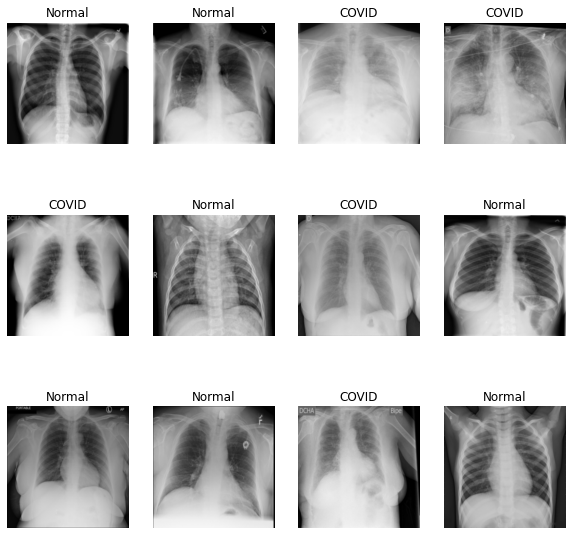

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

create function for spliting dataset

In [7]:
def split_dataset(ds, train_sp=0.8, val_sp=0.1, test_sp=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
         
    train_size = int(train_sp * ds_size)
    val_size = int(val_sp * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = split_dataset(dataset)

In [9]:
len(train_ds)

181

In [10]:
len(val_ds)

22

In [11]:
len( test_ds)

24

Resizing and rescaling dataset and data augmentation

In [12]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [13]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), padding="same", activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), padding="same", activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), padding="same", activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
    
])
model.build(input_shape = input_shape)

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 256, 256, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 128, 128, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 128, 128, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 64, 64, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 64, 64, 64)         

In [16]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [17]:
# from keras import callbacks
# earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
#                                         mode ="min", patience = 5, 
#                                         restore_best_weights = True)

In [18]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)
#callbacks =[earlystopping]

Epoch 1/60
181/181 [==============================] - 1124s 4s/step - loss: 0.6986 - accuracy: 0.5470 - val_loss: 0.6364 - val_accuracy: 0.6463
Epoch 2/60
181/181 [==============================] - 1033s 5s/step - loss: 0.5908 - accuracy: 0.6839 - val_loss: 0.5533 - val_accuracy: 0.7358
Epoch 3/60
181/181 [==============================] - 1188s 5s/step - loss: 0.5606 - accuracy: 0.7137 - val_loss: 0.5889 - val_accuracy: 0.6818
Epoch 4/60
181/181 [==============================] - 1233s 5s/step - loss: 0.5376 - accuracy: 0.7310 - val_loss: 0.5433 - val_accuracy: 0.7003
Epoch 5/60
181/181 [==============================] - 1173s 5s/step - loss: 0.5223 - accuracy: 0.7471 - val_loss: 0.5026 - val_accuracy: 0.7599
Epoch 6/60
181/181 [==============================] - 1351s 5s/step - loss: 0.5046 - accuracy: 0.7530 - val_loss: 0.5467 - val_accuracy: 0.7159
Epoch 7/60
181/181 [==============================] - 1238s 6s/step - loss: 0.4910 - accuracy: 0.7659 - val_loss: 0.4874 - val_accuracy:

181/181 [==============================] - 1166s 5s/step - loss: 0.1261 - accuracy: 0.9499 - val_loss: 0.1313 - val_accuracy: 0.9531
Epoch 58/60
181/181 [==============================] - 1090s 4s/step - loss: 0.1246 - accuracy: 0.9490 - val_loss: 0.0721 - val_accuracy: 0.9759
Epoch 59/60
181/181 [==============================] - 1296s 6s/step - loss: 0.1045 - accuracy: 0.9603 - val_loss: 0.0772 - val_accuracy: 0.9759
Epoch 60/60
181/181 [==============================] - 1456s 5s/step - loss: 0.1189 - accuracy: 0.9544 - val_loss: 0.1181 - val_accuracy: 0.9517


In [19]:
scores = model.evaluate(test_ds)

24/24 [==============================] - 381s 2s/step - loss: 0.0923 - accuracy: 0.9661


first image to predict
actual label to predict: COVID
predicted label : COVID


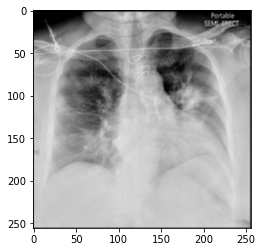

In [20]:
for images_batch, lables_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = lables_batch[0].numpy()
    print('first image to predict')
    plt.imshow(first_image)
    print('actual label to predict:', class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print('predicted label :', class_names[np.argmax(batch_prediction[0])])

In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.argmax(predictions[0])))
    return predicted_class, confidence

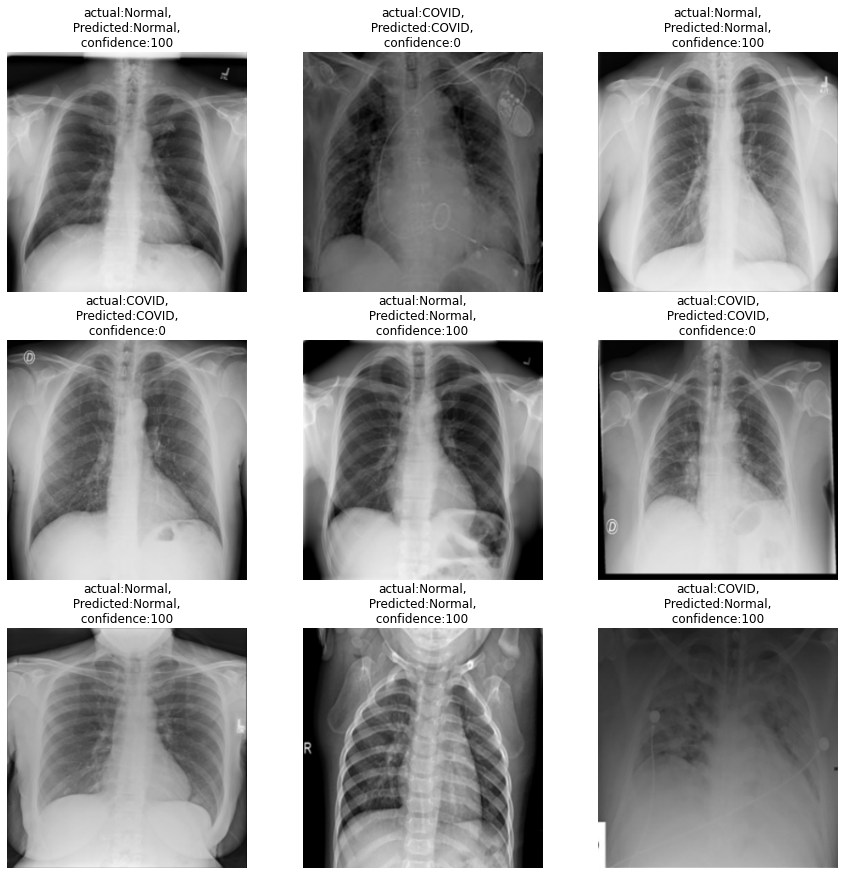

In [28]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class ,confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f'actual:{actual_class},\n Predicted:{predicted_class}, \n confidence:{confidence} ')
        plt.axis('off')

In [29]:
model_version = 4
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets
